# Resistência à compressão do concreto

O concreto é o material mais importante na engenharia civil. A resistência à compressão do concreto é uma função altamente não linear da idade e dos ingredientes.

![](https://drive.google.com/uc?export=view&id=1MXssWVXGzrqUkKc0rcf6icjeV2qi3L26) 


**Área de Assunto**<br>
Física e Química

**Tarefas Associadas**<br>
Regressão

**Tipo de Caraterística**<br>
Real

**# Instâncias**<br>
1030

**# Caraterísticas**<br>
8

| Nome da Variável             | Função  | Tipo       | Descrição   | Unidades | Valores Faltantes |
|-----------------------------|---------|------------|-------------|----------|-------------------|
| Cimento                     | Entrada | Contínua   |             | kg/m^3   | não               |
| Escória de Alto-Forno        | Entrada | Inteira    |             | kg/m^3   | não               |
| Cinza Volante                | Entrada | Contínua   |             | kg/m^3   | não               |
| Água                         | Entrada | Contínua   |             | kg/m^3   | não               |
| Superplastificante           | Entrada | Contínua   |             | kg/m^3   | não               |
| Agregado Graúdo              | Entrada | Contínua   |             | kg/m^3   | não               |
| Agregado Miúdo               | Entrada | Contínua   |             | kg/m^3   | não               |
| Idade                        | Entrada | Inteira    |             | dias     | não               |
| Resistência à compressão do concreto | Alvo   | Contínua   |             | MPa      | não               |

O conjunto de dados pode ser encontrado no seguinte link https://archive.ics.uci.edu/dataset/165/concrete+compression+strength


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)]import pandas as pd
import matplotlib.pyplot as plt # plot and graphics
import seaborn as sns # plot and graphics
from sklearn.model_selection import train_test_split # dividir o dataset em training e testing
#pd.set_option('display.precision', 4)
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.dates as mdates # datetime format for plotting temporal data in intervals

In [7]:
df = pd.read_excel('Concrete_Data.xls')

In [11]:
# Check the first 10 rows of the dataset
df.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30
5,266.00,114.00,0.00,228.00,0.00,932.00,670.00,90,47.03
6,380.00,95.00,0.00,228.00,0.00,932.00,594.00,365,43.70
7,380.00,95.00,0.00,228.00,0.00,932.00,594.00,28,36.45
8,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
9,475.00,0.00,0.00,228.00,0.00,932.00,594.00,28,39.29


In [9]:
# Size of dataset
df.shape

(1030, 9)

In [50]:
# Check columns and data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### **1- Normalização vs Padronização (Normalization vs Standardization)**

Neste Laboratorio, investigaremos como diferentes métodos de dimensionamento de recursos afetam o poder de previsão da regressão linear.

Primeiramente, aprenderemos sobre dois métodos de dimensionamento de recursos amplamente adotados. Em seguida, aplicaremos essas técnicas de dimensionamento de recursos a um conjunto de dados de brinquedo. Por fim, compararemos e contrastaremos os resultados.

### **2- Escalonamento de Variáveis**
No aprendizado de máquina, o escalonamento de variáveis refere-se ao processo de colocar os valores das variáveis dentro da mesma faixa. O escalonamento é extremamente importante para algoritmos que consideram as distâncias entre as observações, como o k-vizinhos mais próximos (k-nearest neighbors).

Uma técnica para escalonar os dados é comprimi-los dentro de um intervalo pré-definido.

<img src="https://drive.google.com/uc?export=view&id=1GR-uD9H3qnTLY5cLbHKOUTyvqBpB_jLZ" width="800">

<br>

##### **Normalização**
Na normalização, mapeamos o valor mínimo da variável para 0 e o valor máximo para 1. Assim, os valores das variáveis são ajustados para o intervalo $[0, 1]$.

A equação de normalização é expressa da seguinte forma:

$$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

Onde:
- $x$ é o valor original da variável,
- $x_{min}$ é o valor mínimo da variável,
- $x_{max}$ é o valor máximo da variável,
- $x'$ é o valor normalizado (no intervalo $[0, 1]$).

<br>

##### **Padronização**
Na padronização, não forçamos os dados a se encaixarem em uma faixa específica. Em vez disso, transformamos os dados para que tenham uma média de $0$ e um desvio padrão de $1$:

A equação de padronização é expressa da seguinte forma:

$$
z = \frac{x - \mu}{\sigma}
$$

Onde:
- $x$ é o valor original da variável,
- $\mu$ é a média da variável,
- $\sigma$ é o desvio padrão da variável,
- $z$ é o valor padronizado (com média $0$ e desvio padrão $1$).

Além de ajudar no escalonamento, a padronização também centraliza os dados.

De modo geral, a padronização é mais adequada do que a normalização na maioria dos casos.


### **3. Escalonamento de Variáveis em Python**
Para ilustrar melhor o uso do escalonamento de variáveis, vamos aplicar o que aprendemos até agora. Em Python, podemos usar a biblioteca scikit-learn para todas as tarefas de aprendizado de máquina, incluindo o pré-processamento.

Nesta seção, trabalharemos com o conjunto de dados sobre a resistência à compressão do concreto. O problema de regressão consiste em prever a resistência à compressão do concreto, dado as quantidades de sete componentes e a idade do concreto. Este conjunto de dados contém $8$ variáveis numéricas de entrada e $1030$ instâncias.

Um boxplot exibe graficamente a mediana, os quartis e a faixa dos dados numéricos. Vamos analisar as variáveis de entrada do conjunto de dados sobre a resistência à compressão do concreto usando um boxplot:

In [17]:
# Statistical summary, tip-> describe
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.36,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.75,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.35,968.00,779.51,28.00,34.44
75%,350.00,142.95,118.27,192.00,10.16,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


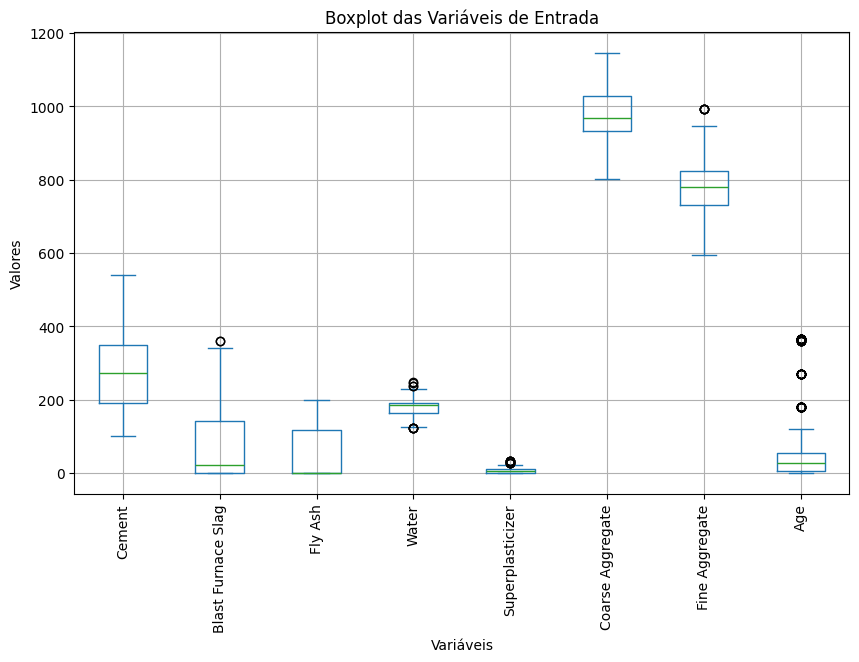

In [51]:
# Selecionar as oito variáveis de interesse
features = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
            'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']

df[features].plot(kind='box', figsize=(10,6))
plt.grid(True)
plt.title('Boxplot das Variáveis de Entrada')
plt.ylabel('Valores')
plt.xlabel('Variáveis')
plt.xticks(rotation= 90)
plt.show()


#### **3.1 Training e Testing**
Para criar um conjunto de treinamento e um conjunto de teste a partir do DataFrame que você forneceu, você pode usar a biblioteca `scikit-learn`. Abaixo está um exemplo de como fazer isso para um problema de regressão, usando $80\%$ dos dados para treinamento e $20\%$ para teste:

In [35]:
# Definir as variáveis independentes (X) e a variável dependente (y)
X = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
         'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']]
y = df['Concrete compressive strength']

# Criar o conjunto de treinamento e o conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir as dimensões dos conjuntos
print("Conjunto de treinamento:", X_train.shape, y_train.shape)
print("Conjunto de teste:", X_test.shape, y_test.shape)

Conjunto de treinamento: (824, 8) (824,)
Conjunto de teste: (206, 8) (206,)


#### **3.2. Normalização**
Os valores das variáveis são ajustados para o intervalo $[0, 1]$.

A equação de normalização é expressa da seguinte forma:

$$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

Para normalização, utilizamos o min-max scaler do `scikit-learn`:

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Normalizar os dados de entrada
X_train_scaled_normalization = scaler.fit_transform(X_train)
X_test_scaled_normalization = scaler.transform(X_test)

# Criar um DataFrame com os dados normalizados
scaled_features_normalization = pd.DataFrame(X_train_scaled_normalization, columns=X.columns)

# Statistical summary, tip-> describe
print(scaled_features_normalization.describe())

       Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
count  824.00              824.00   824.00 824.00            824.00   
mean     0.41                0.21     0.27   0.48              0.19   
std      0.25                0.24     0.33   0.17              0.19   
min      0.00                0.00     0.00   0.00              0.00   
25%      0.21                0.00     0.00   0.34              0.00   
50%      0.40                0.06     0.00   0.51              0.19   
75%      0.59                0.40     0.61   0.56              0.31   
max      1.00                1.00     1.00   1.00              1.00   

       Coarse Aggregate  Fine Aggregate    Age  
count            824.00          824.00 824.00  
mean               0.50            0.45   0.12  
std                0.23            0.20   0.17  
min                0.00            0.00   0.00  
25%                0.38            0.33   0.03  
50%                0.49            0.46   0.07  
75%              

Como regra geral, ajustamos um `scaler` nos dados de teste e, em seguida, transformamos todo o conjunto de dados com ele. Ao fazer isso, ignoramos completamente o conjunto de teste enquanto construímos o modelo.

Normalizando o conjunto de dados obtemos:

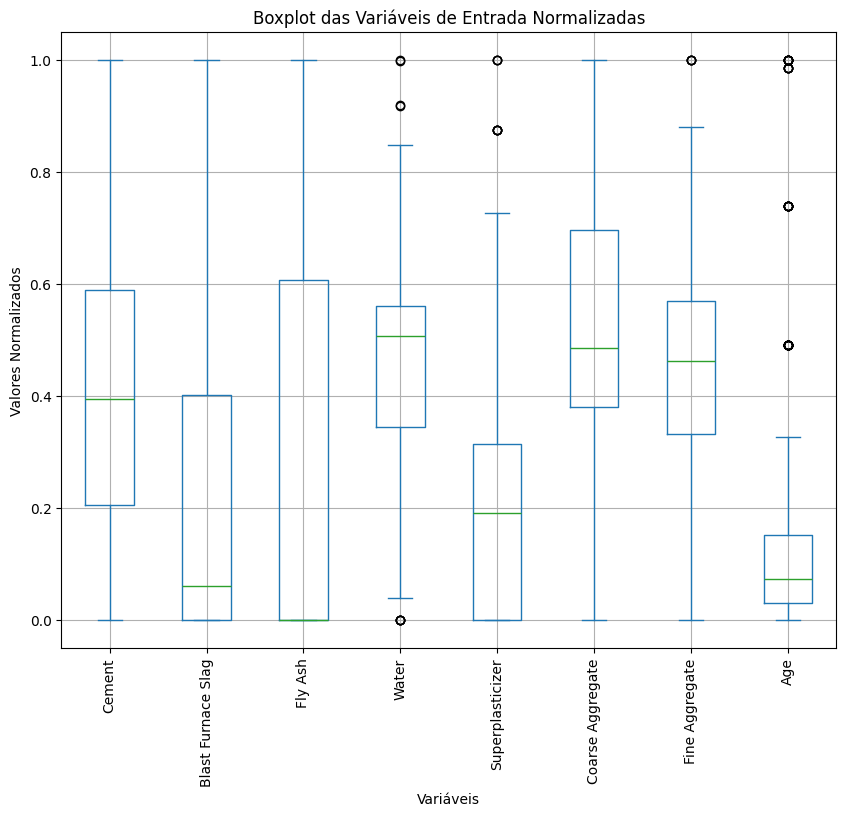

In [49]:
# Criar o boxplot para os dados normalizados,
# Variáveis vs Valores Normalizados
######### HERE YOUR CODE #########
scaled_features_normalization.plot(kind='box', figsize=(10,8))
plt.title('Boxplot das Variáveis de Entrada Normalizadas')
plt.ylabel('Valores Normalizados')
plt.xlabel('Variáveis')
plt.grid(True)
plt.xticks(rotation= 90)
plt.show()

Como prometido, todos os valores de diferentes domínios são transformados para a faixa $[0, 1]$. A observação cuidadosa da última variável revela que valores extremos fora do padrão forçam a maioria dos valores observados a se concentrar em uma faixa ainda menor. Além disso, os valores extremos fora do padrão nas novas observações podem ser perdidos.

#### **3.3. Padronização (Standardization)**
Rransformamos os dados para que tenham uma média de $0$ e um desvio padrão de $1$:

A equação de padronização é expressa da seguinte forma:

$$
z = \frac{x - \mu}{\sigma}
$$

Para padronizar um recurso, usamos o standard scaler:

In [46]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

# Padronizar os dados de entrada
X_train_scaled_standardization = scaler.fit_transform(X_train)
X_test_scaled_standardization = scaler.transform(X_test)

# Criar um DataFrame com os dados padronizados
scaled_features_standardization = pd.DataFrame(X_train_scaled_standardization, columns=X.columns)

# Statistical summary, tip-> describem
print(scaled_features_standardization.describe())

       Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
count  824.00              824.00   824.00 824.00            824.00   
mean    -0.00                0.00     0.00   0.00             -0.00   
std      1.00                1.00     1.00   1.00              1.00   
min     -1.69               -0.86    -0.83  -2.82             -1.03   
25%     -0.85               -0.86    -0.83  -0.79             -1.03   
50%     -0.08               -0.60    -0.83   0.17             -0.01   
75%      0.71                0.81     1.02   0.48              0.66   
max      2.39                3.28     2.22   3.06              4.37   

       Coarse Aggregate  Fine Aggregate    Age  
count            824.00          824.00 824.00  
mean               0.00            0.00  -0.00  
std                1.00            1.00   1.00  
min               -2.19           -2.20  -0.72  
25%               -0.53           -0.56  -0.54  
50%               -0.07            0.08  -0.28  
75%              

Novamente, ajustamos o `scaler` usando apenas as observações do conjunto de dados de treinamento. O boxplot resultante da padronização do conjunto de dados concreto mostra como os recursos são afetados:

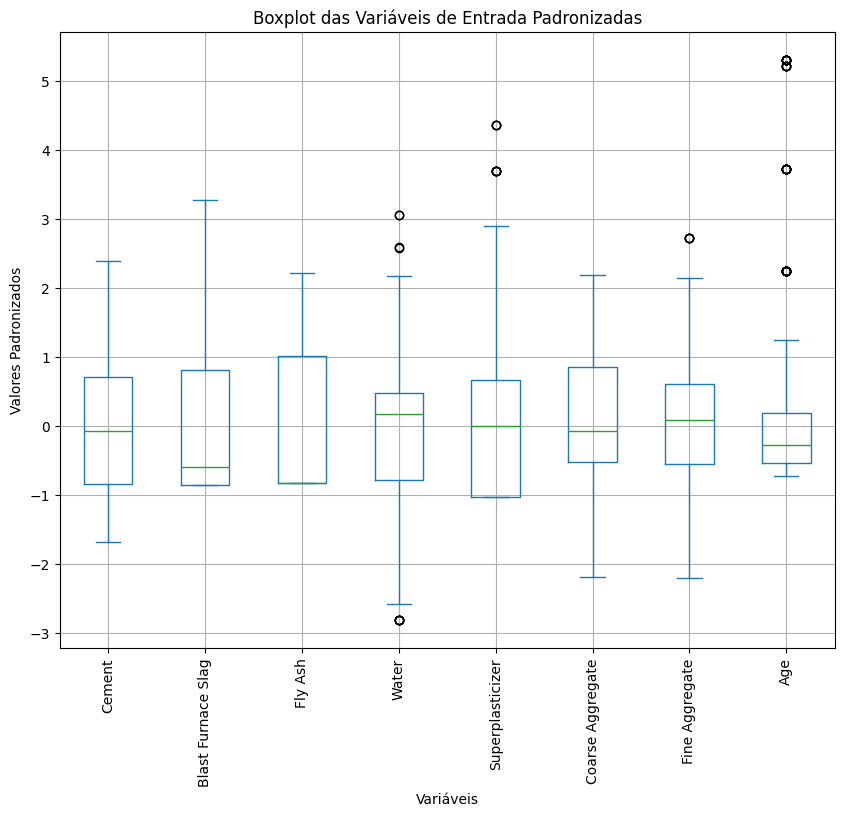

In [52]:
# Criar o boxplot para os dados padronizados
scaled_features_standardization.plot(kind='box', figsize=(10,8))
plt.title('Boxplot das Variáveis de Entrada Padronizadas')
plt.ylabel('Valores Padronizados')
plt.xlabel('Variáveis')
plt.grid(True)
plt.xticks(rotation= 90)
plt.show()


Vamos observar no "Age" que os outliers não afetam como a maioria dos valores são transformados. Além disso, os valores extremos nas novas observações ainda serão representados.

Antes de prosseguir, vamos comparar visualmente como a normalização e a padronização **alteram** os dados. Para fazer isso, vamos plotar a Quarta variável (Água) versus a Quinta variável (Superplastificante)

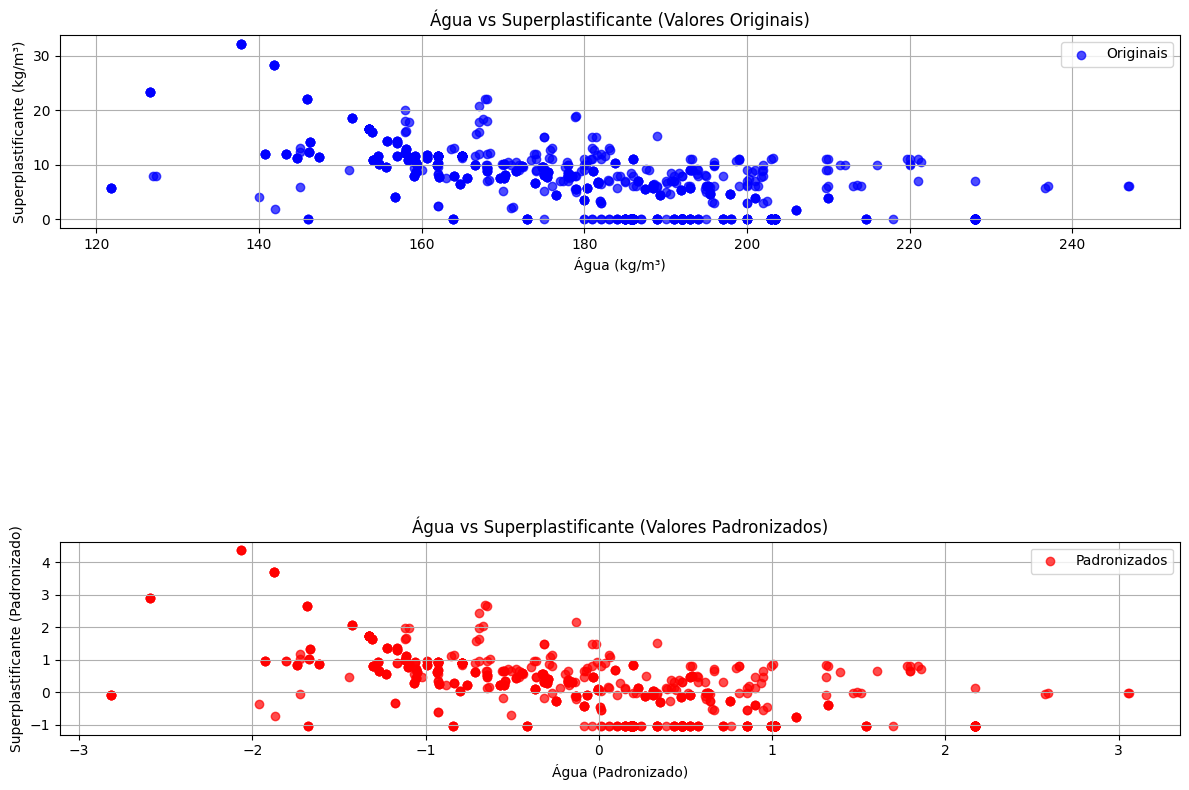

In [48]:
# Selecionar as variáveis de interesse
water = df['Water']  # Quarta variável: Água
superplasticizer = df['Superplasticizer']  # Quinta variável: Superplastificante

# Normalizar os dados
water_normalized = scaled_features_normalization['Water']
superplasticizer_normalized = scaled_features_normalization['Superplasticizer']

# Padronizar os dados
water_standardized = scaled_features_standardization['Water']
superplasticizer_standardized = scaled_features_standardization['Superplasticizer']

# Criar o gráfico
plt.figure(figsize=(12, 8))

# Valores Originais
plt.subplot(3, 1, 1)
plt.scatter(water, superplasticizer, alpha=0.7, color='blue', label='Originais')
plt.title('Água vs Superplastificante (Valores Originais)')
plt.xlabel('Água (kg/m³)')
plt.ylabel('Superplastificante (kg/m³)')
plt.grid()
plt.legend()

# Valores Normalizados
######### HERE YOUR CODE #########

# Valores Padronizados
plt.subplot(3, 1, 3)
plt.scatter(water_standardized, superplasticizer_standardized, alpha=0.7, color='red', label='Padronizados')
plt.title('Água vs Superplastificante (Valores Padronizados)')
plt.xlabel('Água (Padronizado)')
plt.ylabel('Superplastificante (Padronizado)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


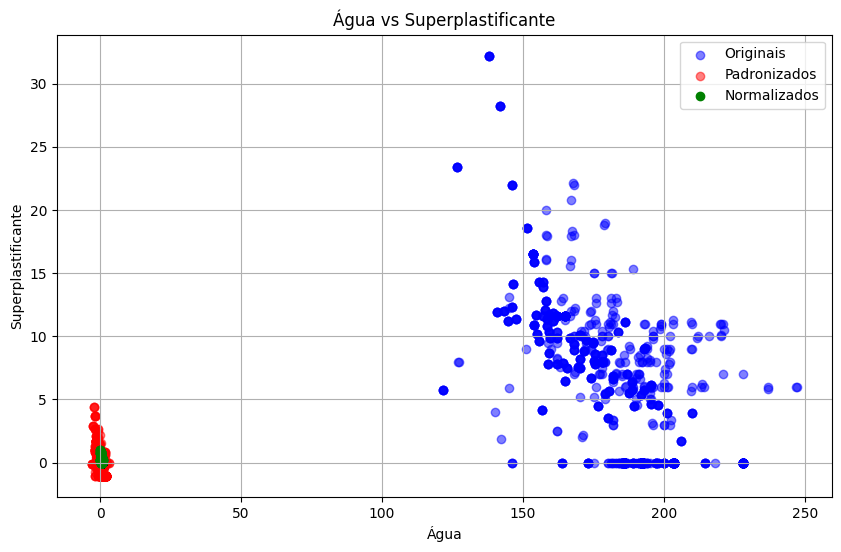

In [53]:
# Criar o gráfico
plt.figure(figsize=(10, 6))

# Valores Originais
plt.scatter(water, superplasticizer, alpha=0.5, color='blue', label='Originais')

# Valores Padronizados
plt.scatter(water_standardized, superplasticizer_standardized, alpha=0.5, color='red', label='Padronizados')

# Valores Normalizados
plt.scatter(water_normalized, superplasticizer_normalized, alpha=1.0, color='green', label='Normalizados')

# Configurações do gráfico
plt.title('Água vs Superplastificante')
plt.xlabel('Água')
plt.ylabel('Superplastificante')
plt.grid()
plt.legend()
plt.show()

Os pontos azuis representam os valores reais dos recursos de entrada. Os pontos vermelhos são os valores padronizados, e os verdes são os valores normalizados. Como esperado, a normalização coloca os pontos de dados próximos uns dos outros. O intervalo resultante é muito pequeno comparado ao conjunto de dados padronizado.

#### **4. Regressão Linear**
Agora que aprendemos como aplicar a normalização das variáveis, podemos prosseguir para o treinamento do modelo de aprendizado de máquina. Vamos construir um modelo de regressão linear:


$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4 + \beta_5x_5 + \beta_6x_6 + \beta_7x_7 + \beta_8x_8
$$

$$
\text{Concrete_compressive_strength} = \beta_0  + \beta_1 \text{Cement} + \beta_2 \text{Blast_Furnace_Slag} + \beta_3 \text{Fly_Ash} + \beta_4 \text{Water} + \beta_5 \text{Superplasticizer} + \beta_6 \text{Coarse_Aggregate} + \beta_7 \text{Fine_Aggregate} + \beta_8 \text{Age}
$$

In [56]:
from sklearn import linear_model

# Crie um objeto de regressão linear
regr = linear_model.LinearRegression()

# Treine o modelo usando os conjuntos de treinamento
regr.fit(X_train, y_train)

# Faça previsões usando o conjunto de teste
y_pred = regr.predict(X_test)

In [57]:
# interceptação
print('Interccept: \n', regr.intercept_)
# os coeficientes
print('Coefficients: \n', regr.coef_)

Interccept: 
 -28.635739356576707
Coefficients: 
 [ 0.11897516  0.10851781  0.08216854 -0.13571192  0.30873202  0.01780436
  0.02406104  0.11644448]


O Erro Quadrático Médio (MSE) é definido pela seguinte equação:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

onde:
- $n$ é o número total de observações,
- $y_i$ é o valor real da $i$-ésima observação,
- $\hat{y}_i$ é o valor predito da $i$-ésima observação.

<img src="https://drive.google.com/uc?export=view&id=1gq4fLWQIchOtQzbsSYYvNxldPqcyuOGd" width="500">


In [58]:
# Erro quadrático médio, regressão.
from sklearn.metrics import mean_squared_error
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

MSE: 95.98


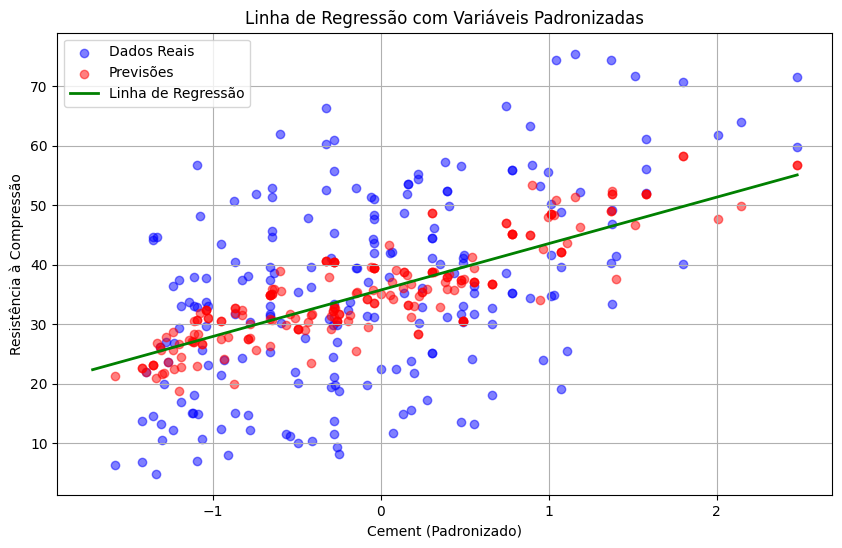

In [60]:
from sklearn.linear_model import LinearRegression

df = pd.read_excel('Concrete_Data.xls')

# Definir as variáveis independentes (X) e a variável dependente (y)
X = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
         'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']]
y = df['Concrete compressive strength']

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Selecionar duas variáveis para a regressão
var1_index = 0  # Índice da primeira variável (ex: 'Cement')
var2_index = 3  # Índice da segunda variável (ex: 'Water')
X_selected = X_scaled[:, [var1_index, var2_index]]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever os valores de y para os dados de teste
y_pred = model.predict(X_test)

# Criar um gráfico
plt.figure(figsize=(10, 6))

# Plotar os dados reais
plt.scatter(X_test[:, 0], y_test, color='blue', label='Dados Reais', alpha=0.5)
plt.scatter(X_test[:, 0], y_pred, color='red', label='Previsões', alpha=0.5)

# Criar uma linha de regressão
# Para isso, vamos usar a primeira variável (Cement) para plotar contra a previsão
x_range = np.linspace(X_selected[:, 0].min(), X_selected[:, 0].max(), 100).reshape(-1, 1)
y_line = model.predict(np.c_[x_range, np.zeros_like(x_range)])  # Mantemos a segunda variável constante

# Plotar a linha de regressão
plt.plot(x_range, y_line, color='green', label='Linha de Regressão', linewidth=2)

# Configurações do gráfico
plt.title('Linha de Regressão com Variáveis Padronizadas')
plt.xlabel('Cement (Padronizado)')
plt.ylabel('Resistência à Compressão')
plt.legend()
plt.grid()
plt.show()